Logistic regression을 활용하여 삼국지 데이터 예측

class가 0, 1인 경우만 쓰시

오
“week8_sam3_testset.xlsx” 데이터로 


학습
“week8_sam3_prediction.xlsx” 데이터를
 예측
“week11_sam3_answer.xlsx”에 답
이 있음
Precision, Recall, F1, Accuracy, MCC 값을CC 값을 추정하시오
.



In [1]:
import pandas as pd
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score,matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_excel('week8_sam3_testset.xlsx')

In [3]:
test=pd.read_excel('week8_sam3_prediction.xlsx')

In [4]:
answer= pd.read_excel('week11_sam3_answer.xlsx')

In [5]:
df = df[df['class'].isin([0, 1])]


X = df.drop('class', axis=1)
y = df['class']

In [6]:
# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [7]:
# 정답
y_pre=answer['class']

test = test.drop(columns=['class'])

In [8]:
y_pred = model.predict(test)

pc = precision_score(y_pred, y_pre)
recall = recall_score(y_pred, y_pre)
accuracy = accuracy_score(y_pred, y_pre)
f1 = f1_score(y_pred, y_pre)
mc= matthews_corrcoef(y_pred, y_pre)

print(f'Accuracy: {pc:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'MCC: {mc:.2f}')


Accuracy: 1.00
Recall: 1.00
F1-score: 1.00
MCC: 1.00


심장병 데이터 예측

“week11_heart_disease.csv” 데이터 활용


마지막 target 칼럼이 label임 (0: 심장병 없음, 1: 심장병 있음)


각 feature의 차원 줄임 (PCA, t-SNE, UMAP 활용) 그래프 생성


K-means로 2개의 군으로 나누어 각 그래프와 비교

Logistic regression을 활용하여 예측 (테스트:예측 = 8:2)

Precision, Recall, F1, Accuracy, MCC 값을 추정하시오

/home/ubuntu/miniforge3/envs/pt20_py310/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


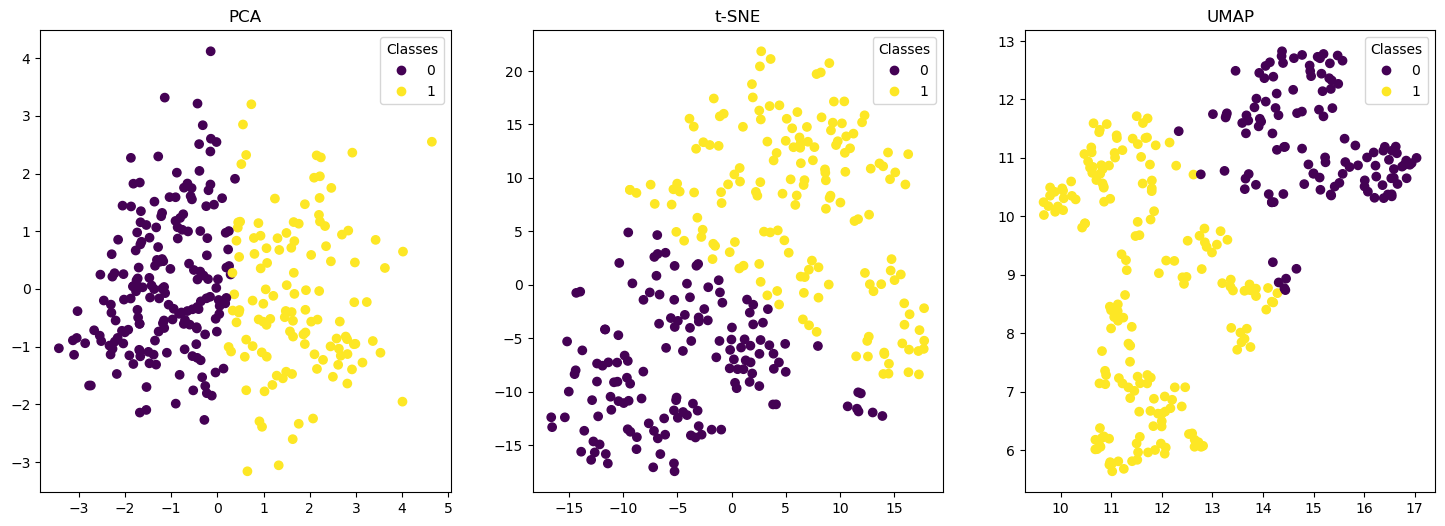

In [9]:
df = pd.read_csv('week11_heart_disease.csv')

X = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X=X_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_pca = kmeans.fit_predict(X_pca)
kmeans_tsne = kmeans.fit_predict(X_tsne)
kmeans_umap = kmeans.fit_predict(X_umap)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scatter_pca  = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca, cmap='viridis')
legend1 = axes[0].legend(*scatter_pca.legend_elements(), title="Classes", loc="upper right")
axes[0].set_title('PCA')

scatter_tsne = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_tsne, cmap='viridis')
legend2 = axes[1].legend(*scatter_tsne.legend_elements(), title="Classes", loc="upper right")
axes[1].set_title('t-SNE')

scatter_umap =axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_umap, cmap='viridis')
legend3 = axes[2].legend(*scatter_umap.legend_elements(), title="Classes", loc="upper right")
axes[2].set_title('UMAP')

plt.show()

In [11]:
results = []

def evaluate_model(X, y, method):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f'--- {method} ---')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Matthews Correlation Coefficient: {mcc:.2f}')
    
    results.append({
        'Method': method,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'MCC': mcc
    })

evaluate_model(X, y, 'Original')
evaluate_model(X_pca, y, 'PCA')
evaluate_model(X_tsne, y, 't-SNE')
evaluate_model(X_umap, y, 'UMAP')

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_excel('week11_247767.xlsx', index=False)

--- Original ---
Precision: 0.87
Recall: 0.84
F1 Score: 0.86
Accuracy: 0.85
Matthews Correlation Coefficient: 0.71
--- PCA ---
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
Accuracy: 0.84
Matthews Correlation Coefficient: 0.67
--- t-SNE ---
Precision: 0.90
Recall: 0.81
F1 Score: 0.85
Accuracy: 0.85
Matthews Correlation Coefficient: 0.71
--- UMAP ---
Precision: 0.79
Recall: 0.72
F1 Score: 0.75
Accuracy: 0.75
Matthews Correlation Coefficient: 0.51
     Method  Precision   Recall  F1 Score  Accuracy       MCC
0  Original   0.870968  0.84375  0.857143  0.852459  0.705060
1       PCA   0.843750  0.84375  0.843750  0.836066  0.671336
2     t-SNE   0.896552  0.81250  0.852459  0.852459  0.709052
3      UMAP   0.793103  0.71875  0.754098  0.754098  0.511853
